In [47]:
import numpy as np
import matplotlib.pyplot as plt
import json
import math

In [48]:
plt.rc('font', size=15)          # controls default text sizes
plt.rc('legend', fontsize=12)

In [49]:
dataset = "superconduct"

{'1': [2, 0.5439574807143206], '2': [6, 0.6385768806974637], '3': [50, 0.6858133329098313], '4': [410, 0.7298399124400013], '5': [2544, 0.762448930123022], '6': [14646, 0.8063220655793365], '7': [71576, 0.8386556918665814], '8': [308622, 0.8621423604542439], '9': [1183427, 0.8819397940889941], '10': [4083523, 0.8956290935737592], '11': [12784812, 0.9043843550837264], '12': [35198139, 0.9108665057368501]}


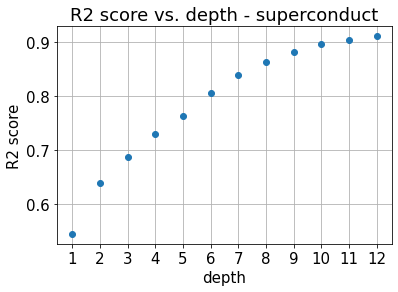

In [50]:
with open(f"../random_forest_builder/scores_{dataset}.json", "r") as f:
    data = json.loads(f.read())
    print(data)
x, y = [], []
for depth, [k, r2] in data.items():
    x.append(depth)
    y.append(r2)
fig, ax = plt.subplots()
ax.set_ylabel("R2 score")
ax.set_xlabel("depth")
ax.plot(x, y, "o")
ax.xaxis.grid()
ax.yaxis.grid()
ax.set_title(f"R2 score vs. depth - {dataset}")
plt.savefig(f"plots/{dataset}_R2", dpi=300)
plt.show()


In [51]:
n=40
no_trees=20

In [52]:
# Proximal method
result_cs = {}
for depth in range(2,5):
    result_cs[depth] = []
    for C in np.linspace(0.1, 1.4, 10):
        for lmda_i, lmda in enumerate(10 ** np.linspace(-5,2,8)):
            try:
                f =open(f"../results/cs/{dataset}_n={n}_no_trees={no_trees}_depth={depth}_C={C:.3}_lambda={lmda:.6}.json")
                data = json.loads(f.read())
                # print(data)
                result_cs[depth].append((data["measurements"], data["mse"]/data['true_fourier_norm_squared'], data["C"], data["lambda"], data["optimization_time"]))
            except:
                print(f"Couldn't find results/{dataset}_n={n}_no_trees={no_trees}_depth={depth}_C={C:.3}_lambda={lmda:.6}.json")

depth 2
depth 3
depth 4


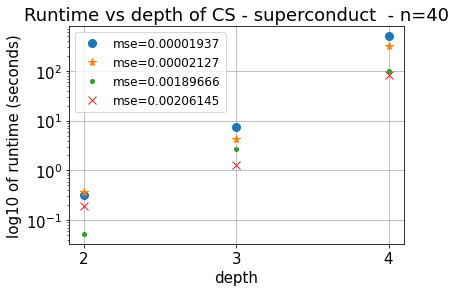

In [53]:
from matplotlib.ticker import MaxNLocator
fig, ax = plt.subplots()
ax.set_ylabel("log10 of runtime (seconds)")
ax.set_xlabel("depth")
y1, y2, y3, y4 = [], [], [], []
x = [2,3,4]
for depth in range(2,5):
    print("depth", depth)
    for m, normalized_mse, C, lmbda, time in result_cs[depth]:
        if C==1.4 and lmbda ==0.001:
            y1.append(time)
            y1_mse = normalized_mse
        if C==0.8222222222222221 and lmbda ==0.001:
            y2.append(time)
            y2_mse = normalized_mse
        if C==1.4 and lmbda ==0.01:
            y3.append(time)
            y3_mse = normalized_mse
        if C==0.8222222222222221 and lmbda ==0.01:
            y4.append(time)
            y4_mse = normalized_mse




ax.plot(x, y1,'o', markersize=8, label=f"mse={100*y1_mse:.8f}")
ax.plot(x, y2,'*', markersize=8, label=f"mse={100*y2_mse:.8f}")
ax.plot(x, y3,'.', markersize=8, label=f"mse={100*y3_mse:.8f}")
ax.plot(x, y4,'x', markersize=8, label=f"mse={100*y4_mse:.8f}")
ax.set_yscale("log")
ax.xaxis.grid()
ax.yaxis.grid()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.legend()
ax.set_title(f"Runtime vs depth of CS - {dataset}  - n=40")
plt.savefig(f"plots/{dataset}_cs_runtimes", dpi=300)
plt.show()


In [13]:
n=324
no_trees=20

In [14]:
# Reed-solomon method examination
result_reed_solomon = {}
for depth in [2,3,4,5,6]:
    print("depth=", depth)
    result_reed_solomon[depth] = []
    for C in [0.05, 0.1 , 0.15, 0.2 , 0.4, 0.6, 0.8]:
        for ratio in [1.1, 2.6, 5.0]:
            try:
                f =open(f"../results/reed_solomon/{dataset}_n={n}_no_trees={no_trees}_depth={depth}_C={C:.3}_ratio={ratio:.3}.json")
                data = json.loads(f.read())
                # print(data)
                normalized_mse = data["mse"]/data['true_fourier_norm_squared']
                print(data["C"], data["ratio"], normalized_mse, data["measurements"])
                result_reed_solomon[depth].append((data["measurements"], data["mse"]/data['true_fourier_norm_squared'],  data["C"], data["ratio"],  data["time_cached"]))
            except:
                print(f"Could not find {dataset}_n={n}_no_trees={no_trees}_depth={depth}_C={C:.3}_ratio={ratio:.3}.json")

depth= 2
Could not find superconduct_n=324_no_trees=20_depth=2_C=0.05_ratio=1.1.json
Could not find superconduct_n=324_no_trees=20_depth=2_C=0.05_ratio=2.6.json
Could not find superconduct_n=324_no_trees=20_depth=2_C=0.05_ratio=5.0.json
Could not find superconduct_n=324_no_trees=20_depth=2_C=0.1_ratio=1.1.json
Could not find superconduct_n=324_no_trees=20_depth=2_C=0.1_ratio=2.6.json
Could not find superconduct_n=324_no_trees=20_depth=2_C=0.1_ratio=5.0.json
Could not find superconduct_n=324_no_trees=20_depth=2_C=0.15_ratio=1.1.json
Could not find superconduct_n=324_no_trees=20_depth=2_C=0.15_ratio=2.6.json
Could not find superconduct_n=324_no_trees=20_depth=2_C=0.15_ratio=5.0.json
0.2 1.1 1.0 0
0.2 2.6 1.0 0
0.2 5.0 1.0 0
Could not find superconduct_n=324_no_trees=20_depth=2_C=0.4_ratio=1.1.json
0.4 2.6 1.0 0
0.4 5.0 1.0 0
0.6 1.1 0.016071458512447352 348
0.6 2.6 1.0 0
0.6 5.0 1.0 0
0.8 1.1 0.016071458512447352 348
0.8 2.6 1.0 0
0.8 5.0 1.0 0
depth= 3
Could not find superconduct_n=324_

In [15]:
# Reed solomon one more time after examination
C_ratio_list = {2:[(0.6,1.1)], 3:[(0.1,1.1)], 4:[(0.05, 2.6)], 5:[(0.05, 5.0)]}
result_reed_solomon = {}
for depth in [2, 3, 4, 5, 6]:
    print(depth)
    result_reed_solomon[depth] = []
    for C in [0.05, 0.1, 0.15, 0.2, 0.4, 0.6, 0.8]:
        for ratio in [1.1, 2.6, 5.0]:
            try:
                f =open(f"../results/reed_solomon/{dataset}_n={n}_no_trees={no_trees}_depth={depth}_C={C:.3}_ratio={ratio:.3}.json")
                data = json.loads(f.read())
                normalized_mse = data["mse"]/data['true_fourier_norm_squared']
                print(data["C"], data["ratio"], data["mse"], normalized_mse, data["measurements"])
                if normalized_mse<0.3:
                    result_reed_solomon[depth].append((data["measurements"], data["mse"],  data["C"], data["ratio"],  data["time_cached"]))
            except:
                print(f"Could not find {dataset}_n={n}_no_trees={no_trees}_depth={depth}_C={C:.3}_ratio={ratio:.3}.json")

2
Could not find superconduct_n=324_no_trees=20_depth=2_C=0.05_ratio=1.1.json
Could not find superconduct_n=324_no_trees=20_depth=2_C=0.05_ratio=2.6.json
Could not find superconduct_n=324_no_trees=20_depth=2_C=0.05_ratio=5.0.json
Could not find superconduct_n=324_no_trees=20_depth=2_C=0.1_ratio=1.1.json
Could not find superconduct_n=324_no_trees=20_depth=2_C=0.1_ratio=2.6.json
Could not find superconduct_n=324_no_trees=20_depth=2_C=0.1_ratio=5.0.json
Could not find superconduct_n=324_no_trees=20_depth=2_C=0.15_ratio=1.1.json
Could not find superconduct_n=324_no_trees=20_depth=2_C=0.15_ratio=2.6.json
Could not find superconduct_n=324_no_trees=20_depth=2_C=0.15_ratio=5.0.json
0.2 1.1 1398.8587243216887 1.0 0
0.2 2.6 1398.8587243216887 1.0 0
0.2 5.0 1398.8587243216887 1.0 0
Could not find superconduct_n=324_no_trees=20_depth=2_C=0.4_ratio=1.1.json
0.4 2.6 1398.8587243216887 1.0 0
0.4 5.0 1398.8587243216887 1.0 0
0.6 1.1 22.481699952711047 0.016071458512447352 348
0.6 2.6 1398.858724321688

In [16]:
# Binning method
from math import ceil
result_binning = {}

for depth in [2, 3, 4, 5, 6]:
    found = 0
    not_found = 0
    print("depth=", depth)
    result_binning[depth] = []
    for C in [0.05, 0.1 , 0.15, 0.2 , 0.4, 0.6, 0.8]:
        for ratio in [1.1, 2.6, 5.0]:
            # Iterations over the frequency recovery primitive
            cs_bins_range = np.linspace(0.2 * depth ** 2 , depth ** 2, 10)
            cs_bins_range = [ceil(a) for a in cs_bins_range]
            for cs_bins in cs_bins_range:
                for cs_iterations in [1, 2, 3]:
                    for cs_ratio in [1.1, 1.3, 1.5, 1.9, 2.1, 3.0]:
                        try:
                            f =open(f"../results/binning/{dataset}_n={n}_no_trees={no_trees}_depth={depth}_"
                                    f"C={C:.3}_ratio={ratio:.3}_csbins={cs_bins}_csiterations={cs_iterations}_"
                                    f"csratio={cs_ratio}.json")
                            found+=1 
                            data = json.loads(f.read())
                            #print(data)
                            normalized_mse = data["mse"]/data['true_fourier_norm_squared']
                            if normalized_mse<0.3:
                                result_binning[depth].append((data["measurements"], data["mse"]))
                        except:
                            not_found+=1
                            #print(f"Could not find {dataset}_n={n}_no_trees={no_trees}_depth={depth}_"
                            #        f"C={C:.3}_ratio={ratio:.3}_csbins={cs_bins}_csiterations={cs_iterations}_"
                            #        f"csratio={cs_ratio}.json")
    print(f"found {found}, not found {not_found}")

depth= 2
found 1878, not found 1905
depth= 3
found 3327, not found 453
depth= 4
found 3660, not found 120
depth= 5
found 3717, not found 63
depth= 6
found 3759, not found 21


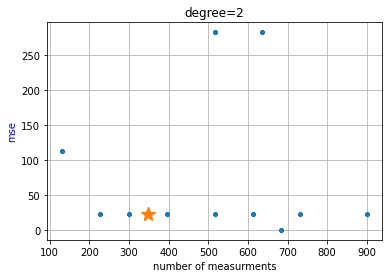

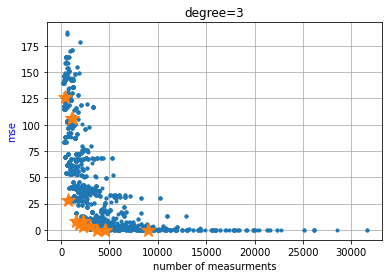

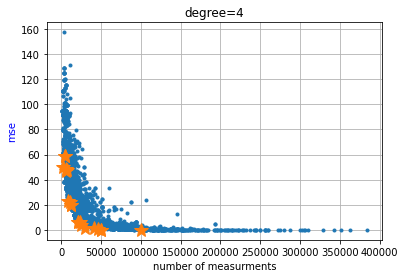

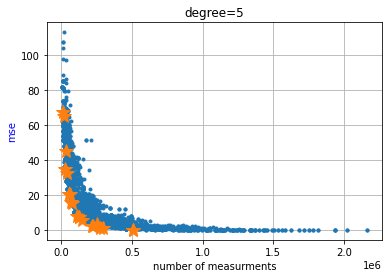

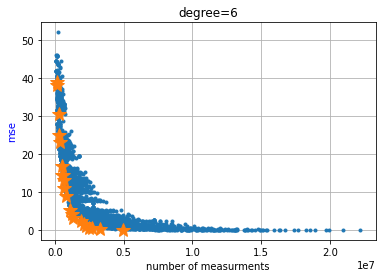

In [20]:
for depth in [2, 3, 4, 5, 6]:
    fig, ax = plt.subplots()
    ax.set_ylabel("mse", color="blue")
    ax.set_xlabel("number of measurements")
    ax.plot([a[0] for a in result_binning[depth]],[a[1] for a in result_binning[depth]],'.')
    ax.plot([a[0] for a in result_reed_solomon[depth]],[a[1] for a in result_reed_solomon[depth]],'*', markersize=15)
    ax.xaxis.grid()
    ax.yaxis.grid()
    ax.set_title(f"degree={depth}")
    plt.savefig(f"plots/reed_solomon/superconduct-n={n}_d={depth}", dpi=300)
    plt.show()


In [23]:
# Random measurement method
from math import ceil
result_random = {}
for depth in [2,3,4,5]:
    result_random[depth] = []
    for C in [0.05, 0.1 , 0.15, 0.2 , 0.4, 0.6, 0.8]:
        for ratio in [1.1, 2.6, 5.0]:
            for sampling_factor in np.linspace(0.2,1.4,10):
                try:
                    dir_string= f"../results/random_parallel/{dataset}_n={n}_no_trees={no_trees}_depth={depth}_C={C:.3}_ratio={ratio:.3}_samplefactor={sampling_factor:.3}_ncores=10.json"
                    f =open(dir_string)
                    data = json.loads(f.read())
                    print(data)
                    normalized_mse = data["mse"]/data['true_fourier_norm_squared']
                    if normalized_mse < 0.1:
                        result_random[depth].append((data["measurements"], data["mse"]))
                except:
                    pass
                    # print(f" Couldn't find {dir_string}")

{'n': 324, 'no_trees': 20, 'depth': 2, 'C': 0.2, 'ratio': 1.1, 'sampling_factor': 0.2, 'n_cores': 10, 'wait_time': 100, 'k': 6, 'time_uncached': 3.552436828613281e-05, 'time_cached': 1.0013580322265625e-05, 'equality': False, 'mse': 1398.8587243216887, 'true_fourier_norm_squared': 1398.8587243216887, 'computed_fourier_norm_squared': 0, 'measurements': 0}
{'n': 324, 'no_trees': 20, 'depth': 2, 'C': 0.2, 'ratio': 1.1, 'sampling_factor': 0.33333333333333337, 'n_cores': 10, 'wait_time': 100, 'k': 6, 'time_uncached': 4.6253204345703125e-05, 'time_cached': 1.0967254638671875e-05, 'equality': False, 'mse': 1398.8587243216887, 'true_fourier_norm_squared': 1398.8587243216887, 'computed_fourier_norm_squared': 0, 'measurements': 0}
{'n': 324, 'no_trees': 20, 'depth': 2, 'C': 0.2, 'ratio': 1.1, 'sampling_factor': 0.4666666666666667, 'n_cores': 10, 'wait_time': 100, 'k': 6, 'time_uncached': 4.8160552978515625e-05, 'time_cached': 1.0013580322265625e-05, 'equality': False, 'mse': 1398.8587243216887, 

In [ ]:
for depth in [2, 3, 4, 5, 6]:
    fig, ax = plt.subplots()
    ax.set_ylabel("mse", color="blue")
    ax.set_xlabel("number of measurements")
    ax.plot([a[0] for a in result_binning[depth]],[a[1] for a in result_binning[depth]],'.')
    ax.plot([a[0] for a in result_reed_solomon[depth]],[a[1] for a in result_reed_solomon[depth]],'*', markersize=15)
    ax.plot([a[0] for a in result_random[depth] if a[0]<2500 ],[a[1] for a in result_random[depth] if a[0]<2500],'r*', markersize=4)
    ax.xaxis.grid()
    ax.yaxis.grid()
    ax.set_title(f"degree={depth}")
    plt.savefig(f"plots/superconduct-n={n}_d={depth}", dpi=300)
    plt.show()


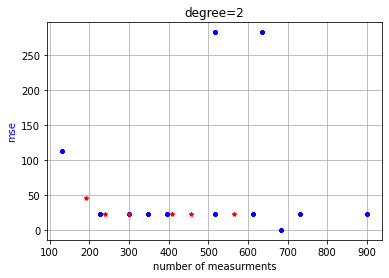

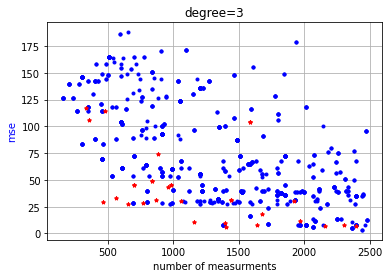

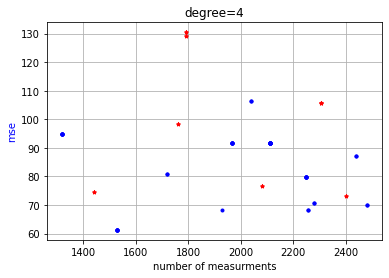

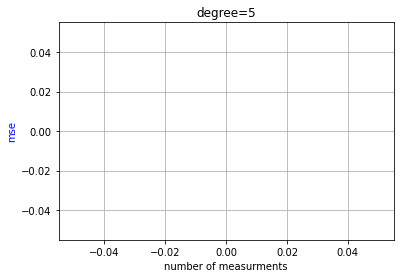

In [25]:
for depth in [2,3,4,5]:
    fig, ax = plt.subplots()
    ax.set_ylabel("mse", color="blue")
    ax.set_xlabel("number of measurments")
    ax.plot([a[0] for a in result_binning[depth] if a[0]<2500],[a[1] for a in result_binning[depth] if a[0]<2500],'b.')
    ax.plot([a[0] for a in result_random[depth] if a[0]<2500 ],[a[1] for a in result_random[depth] if a[0]<2500],'r*', markersize=4)
    # ax.plot([a[0] for a in result_reed_solomon[depth]],[a[1] for a in result_reed_solomon[depth]],'g*', markersize=4)
    ax.xaxis.grid()
    ax.yaxis.grid()
    ax.set_title(f"degree={depth}")
    #plt.savefig(f"images/random/n={n}_d={degree}", dpi=300)
    plt.show()